In [1]:
from models import *
from initializers import *
import models
import importlib
importlib.reload(models)

def ask_if_continue():
    while True:
        answer = input("Continue? [y/n] ")
        if answer == "y":
            return True
        elif answer == "n":
            return False

def train_momentum(model, epoch_counts, learning_rates, lambdas, report_interval=100, batch_size=None):
    for i in range(len(epoch_counts)):
        for j in range(4):
            model.train(epochs=epoch_counts[i],
                        learning_rate=learning_rates[i],
                        batch=True,
                        optimizer="momentum",
                        momentum_lambda=lambdas[i],
                        report_interval=report_interval,
                        batch_size=batch_size,
                        save_till_best=True)
        if not ask_if_continue():
            break
    model.plot()

def train_rmsprop(model, epoch_counts, learning_rates, rms_beta, report_interval=100, batch_size=None):
    for i in range(len(epoch_counts)):
        model.train(epochs=epoch_counts[i],
                    learning_rate=learning_rates[i],
                    batch=True,
                    optimizer="rmsprop",
                    rms_beta=rms_beta,
                    report_interval=report_interval,
                    batch_size=batch_size)
    model.plot()

## SGD with momentum

Model age: 10	MSE on train set: 57.22	MSE on test set: 272.61
Model age: 20	MSE on train set: 24.34	MSE on test set: 183.39
Model age: 30	MSE on train set: 22.9	MSE on test set: 100.54
Model age: 40	MSE on train set: 3.86	MSE on test set: 48.29
Model age: 50	MSE on train set: 1.51	MSE on test set: 46.13
Model age: 60	MSE on train set: 0.68	MSE on test set: 34.57
Model age: 70	MSE on train set: 2.0	MSE on test set: 26.8
Model age: 80	MSE on train set: 0.34	MSE on test set: 29.65
Model age: 90	MSE on train set: 0.4	MSE on test set: 28.19
Model age: 100	MSE on train set: 0.34	MSE on test set: 26.28
Model age: 110	MSE on train set: 0.29	MSE on test set: 25.77
Model age: 120	MSE on train set: 0.25	MSE on test set: 23.2
Model age: 130	MSE on train set: 0.22	MSE on test set: 23.01
Model age: 140	MSE on train set: 0.21	MSE on test set: 20.66
Model age: 150	MSE on train set: 0.34	MSE on test set: 22.09
Model age: 160	MSE on train set: 1.1	MSE on test set: 21.05
Model age: 170	MSE on train set: 

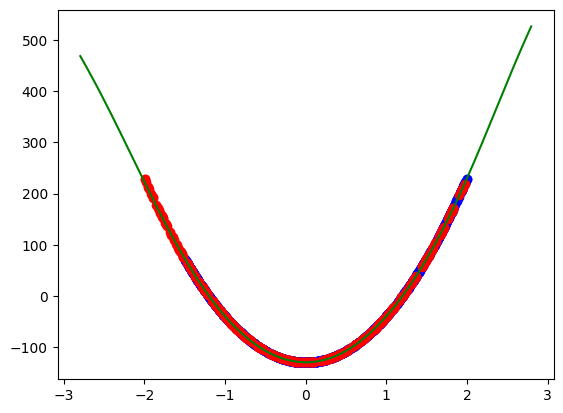

In [3]:
dataset_name = "square-large"
arch = MLPArchitecture(1, [150], 1)
model_momentum = MLP(architecture=arch, dataset_name=dataset_name, initializer=XavierUniformInitializer(), activation_func=Sigmoid())
layer = model_momentum.layers[0]

epoch_length = 500
epoch_counts = [epoch_length, epoch_length, epoch_length, epoch_length, epoch_length, epoch_length]
learning_rates = [0.1, 0.1, 0.1, 0.05, 0.05, 0.05]
lambdas = [0.3, 0.6, 0.8, 0.6, 0.8, 0.6]

train_momentum(model=model_momentum,
               epoch_counts=epoch_counts,
               learning_rates=learning_rates,
               lambdas=lambdas,
               report_interval=10,
               batch_size=1)


### final evaluation

In [6]:
model_momentum.evaluate()

MSE on train set: 0.27	MSE on test set: 1.05


## Mini-batch with RMSProp

In [58]:
dataset_name = "square-large"
arch = MLPArchitecture(1, [100], 1)
model = MLP(architecture=arch, dataset_name=dataset_name, initializer=XavierNormalInitializer())

epoch_counts = [400, 500, 500, 5000]
learning_rates = [0.01, 0.005, 0.001, 0.001]

train_rmsprop(model=model,
              epoch_counts=epoch_counts,
              learning_rates=learning_rates,
              rms_beta=0.9,
              report_interval=10,
              batch_size=1)

Model age: 10	MSE on train set: 21.01	MSE on test set: 268.97
Model age: 20	MSE on train set: 11.53	MSE on test set: 347.51
Model age: 30	MSE on train set: 5.2	MSE on test set: 154.83
Model age: 40	MSE on train set: 1.55	MSE on test set: 112.6
Model age: 50	MSE on train set: 10.45	MSE on test set: 62.45
Model age: 60	MSE on train set: 4.51	MSE on test set: 67.22
Model age: 70	MSE on train set: 23.69	MSE on test set: 182.68
Model age: 80	MSE on train set: 0.81	MSE on test set: 72.14
Model age: 90	MSE on train set: 3.62	MSE on test set: 86.25
Model age: 100	MSE on train set: 8.7	MSE on test set: 98.66
Model age: 110	MSE on train set: 2.65	MSE on test set: 107.87
Model age: 120	MSE on train set: 1.73	MSE on test set: 95.39
Model age: 130	MSE on train set: 3.83	MSE on test set: 123.57
Model age: 140	MSE on train set: 5.97	MSE on test set: 48.51
Model age: 150	MSE on train set: 1.37	MSE on test set: 85.89
Model age: 160	MSE on train set: 7.78	MSE on test set: 94.51
Model age: 170	MSE on tra

KeyboardInterrupt: 